In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss

from sklearn.mixture import GaussianMixture
import pandas as pd


### With BIC, 2 components

In [58]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    gauss.PlotGMM(X,em,10)

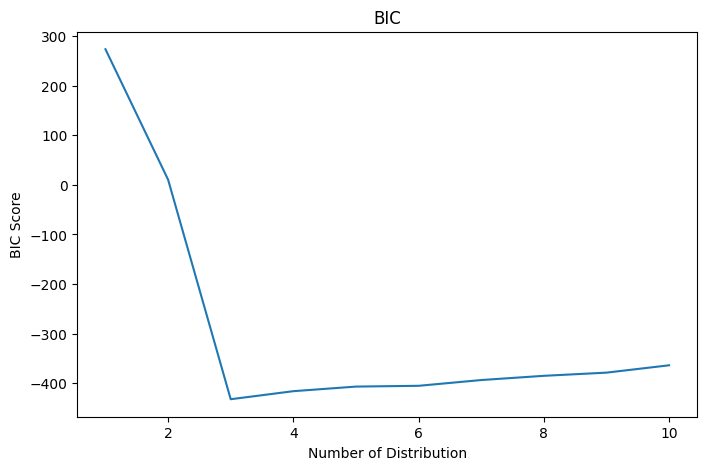

[[{'Mean': 2.703626170478091, 'Variance': 1.3094714003576393, 'Weight': 0.041345778829083066}, {'Mean': 12.547497077893274, 'Variance': 0.538305184647359, 'Weight': 0.06651052851805662}, {'Mean': 11.100931679212223, 'Variance': 0.5870114983652519, 'Weight': 0.1300209949005639}], [{'Mean': -3.3066384182765485, 'Variance': 25.000509736203945, 'Weight': -0.2750669382145967}, {'Mean': 12.720366824607721, 'Variance': 0.955455941205772, 'Weight': 0.07049529453724383}, {'Mean': 9.759920450122845, 'Variance': 3.3358307205374564, 'Weight': 0.3907509850354302}], [{'Mean': -6.238287933941783, 'Variance': 13.09946404358554, 'Weight': 0.4545696054615936}, {'Mean': 12.562081155068997, 'Variance': 1.2341592290240442, 'Weight': 0.0556025599663555}, {'Mean': 9.442046767116564, 'Variance': 5.021120977617325, 'Weight': 0.4956744217454965}], [{'Mean': -5.413730665443143, 'Variance': 17.03586205532187, 'Weight': 0.4814791541469542}, {'Mean': 12.296103534802235, 'Variance': 1.2836172789907832, 'Weight': 0.0

In [66]:
data=gauss.SimulateGMM(1000,10,4,-5,20)

# gauss.PlotTrue(data,[10,-5],[4,20])
n_components=gauss.BIC_gmm(X)
em=gauss.GaussianEM(data,n_components,[])
print(em)

### With BIC, 3 components

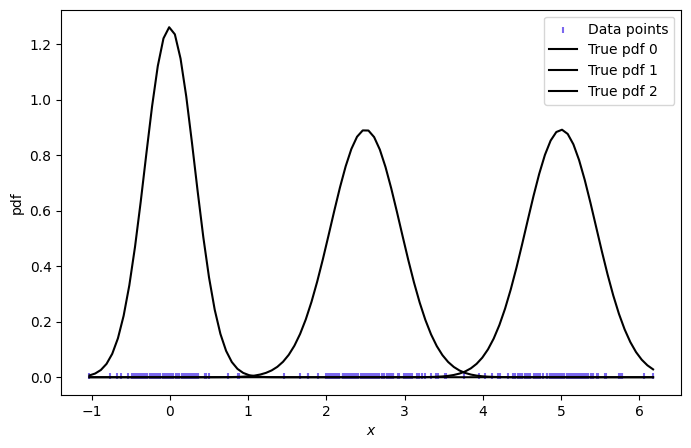

18


In [72]:
X1=np.random.normal(5,np.sqrt(0.2),100)
X2=np.random.normal(2.5,np.sqrt(0.2),100)
X3=np.random.normal(0,np.sqrt(0.1),100)
X=np.array(list(X1)+list(X2)+list(X3))

gauss.PlotTrue(X,[5,2.5,0],[0.2,0.2,0.1])
# EMGMM(X,[])
print(len(gauss.GaussianEM(X,3,[])))

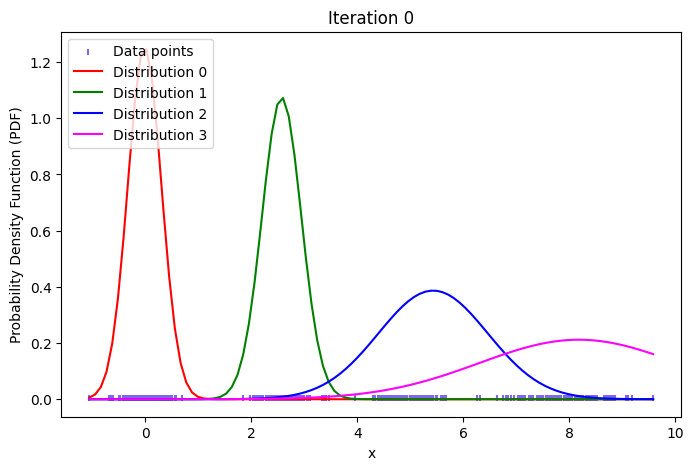

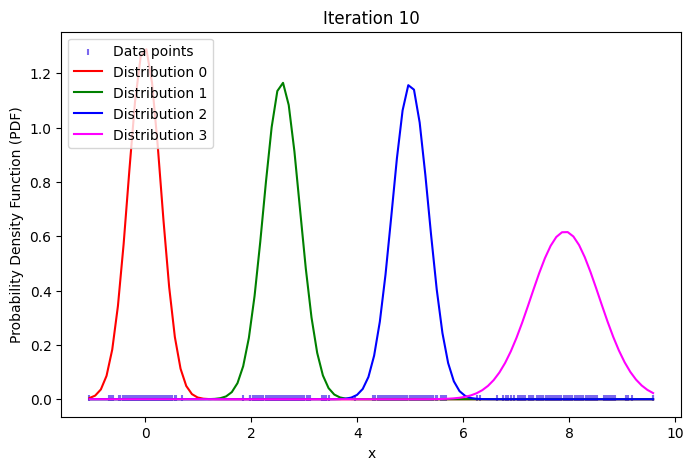

14


In [71]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

# gauss.PlotTrue(D,[0,2.5,5,8],[0.1,0.1,0.1,0.5])
n_components=4
init=({
    'Mean':0.01,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':2.5,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':5,
    'Variance':0.4,
    'Weight':0.25
},{
    'Mean':10,
    'Variance':0.4,
    'Weight':0.25
})
em=gauss.GaussianEM(D,4,init)
gauss.PlotGMM(D,em,10)
print(len(em))

### Trying the KIR dataset

In [ ]:
#Generate data
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')
#print(X)

KIR2DL3_data=B['KIR2DL3'].to_numpy()

In [ ]:
X=KIR2DL3_data
a=({
    'Mean':0.01,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':1.8,
    'Variance':0.1,
    'Weight':1/3
})
EMGMM(X,a)


In [ ]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
EMGMM(KIR2DP1_data,a)

### Use sklearn.mixture.GaussianMixture

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

def fitGaussEM(X):

    X=X.reshape(-1,1)
    gm=GaussianMixture().fit(X)
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    plt.figure(figsize=(8,5))
    M_best_BIC=models[np.argmin(BIC)]
    M_best_AIC=models[np.argmin(AIC)]

    b=np.linspace(np.min(X),np.max(X),100)

    log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
    log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

    resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
    resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

    pdf1=np.exp(log_prob1)
    pdf2=np.exp(log_prob2)


    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()

def fitBayesianGauss(X,) :
    
    X=X.reshape(-1,1)
    gm=BayesianGaussianMixture().fit(X)
    
    bay_gmm_weights = gm.weights_
    np.round(bay_gmm_weights, 2)
    n_clusters_ = (np.round(bay_gmm_weights, 2) > 0).sum()
    print('Estimated number of clusters: ' + str(n_clusters_))



    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()


In [ ]:
X=KIR2DL3_data.reshape(-1,1)
gm=BayesianGaussianMixture(n_components=10,n_init=5).fit(X)

# Number of components estimated
bay_gmm_weights = gm.weights_
np.round(bay_gmm_weights, 2)
n_components = (np.round(bay_gmm_weights, 2) > 0).sum()
print('Estimated number of components: ' + str(n_components))

# Prediction
y_predict  = gm.predict(X)
resp = gm.predict_proba(X)
resp = resp.round(3)
resp

In [ ]:
X=KIR2DL3_data.reshape(-1,1)
fitGaussEM(X)

In [ ]:
X=gauss.SimulateGMM(1000,20,4,6,20)
fitGaussEM(X)